In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()

In [3]:
train_data = pd.read_excel('E:\Data_Science\data sets\Flight-Price-Prediction-master\Flight-Price-Prediction-master\Data_Train.xlsx')
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
pd.set_option('display.max_columns',None)

In [5]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
train_data['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
30h 15m      1
33h 20m      1
35h 35m      1
40h 20m      1
27h 30m      1
Name: Duration, Length: 368, dtype: int64

In [8]:
train_data.dropna(inplace=True)

In [9]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
train_data.shape

(10682, 11)

# EDA

# Date Time
Here we convert Date_of_Journey into Journey_day and Journey_month because our model can not understand that type of data because it is in string format.

In [11]:
train_data['Journey_day'] = pd.to_datetime(train_data.Date_of_Journey, format='%d/%m/%Y').dt.day

In [12]:
train_data['Journey_month'] = pd.to_datetime(train_data.Date_of_Journey, format='%d/%m/%Y').dt.month

In [13]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [14]:
train_data.drop(['Date_of_Journey'], axis=1, inplace=True)

In [15]:
# Now we take departure hour and minute from dep_time
train_data['dep_hour'] = pd.to_datetime(train_data.Dep_Time).dt.hour
train_data['dep_min'] = pd.to_datetime(train_data.Dep_Time).dt.minute

train_data.drop(['Dep_Time'],axis=1,inplace=True)

train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dep_hour,dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [16]:
train_data['arr_hour'] = pd.to_datetime(train_data.Arrival_Time).dt.hour
train_data['arr_min'] = pd.to_datetime(train_data.Arrival_Time).dt.minute

train_data.drop(['Arrival_Time'],axis=1,inplace=True)

train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dep_hour,dep_min,arr_hour,arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [17]:
duration = list(train_data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' 0m'
        else:
            duration[i] = '0h ' + duration[i]
            

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep='h')[0]))
    duration_mins.append(int(duration[i].split(sep='m')[0].split()[-1]))

In [18]:
train_data['dur_hour'] = duration_hours
train_data['dur_min'] = duration_mins

train_data.drop(['Duration'],axis=1,inplace=True)
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dep_hour,dep_min,arr_hour,arr_min,dur_hour,dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


# Handling Categorical Data

1. Nominal data -> Data are not in any order --> OneHotEncoder is used
2. Ordinal data -> Data are in order --> LabelEncoder is used

In [19]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

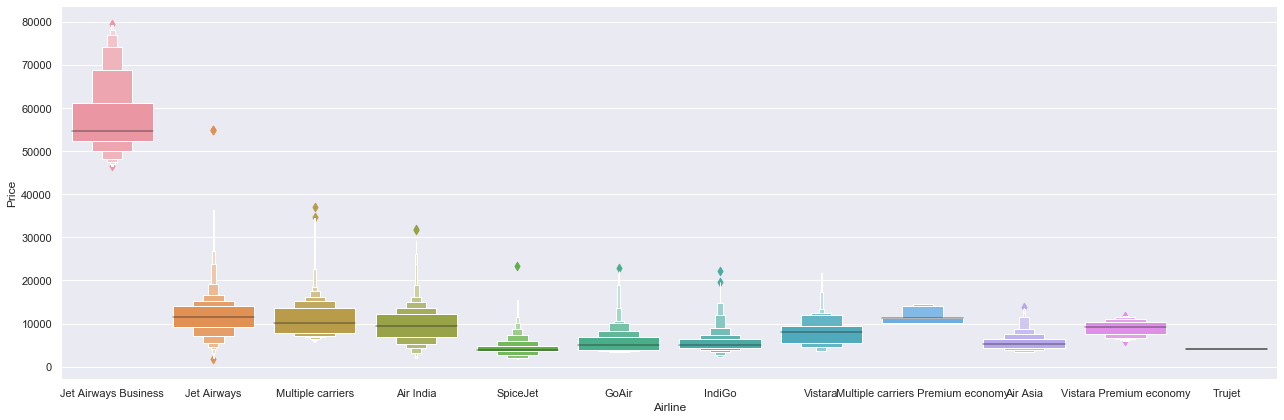

In [20]:
sns.catplot(y='Price',x='Airline',data=train_data.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
plt.show()

In [21]:
Airline = train_data[['Airline']]
Airline = pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [22]:
train_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

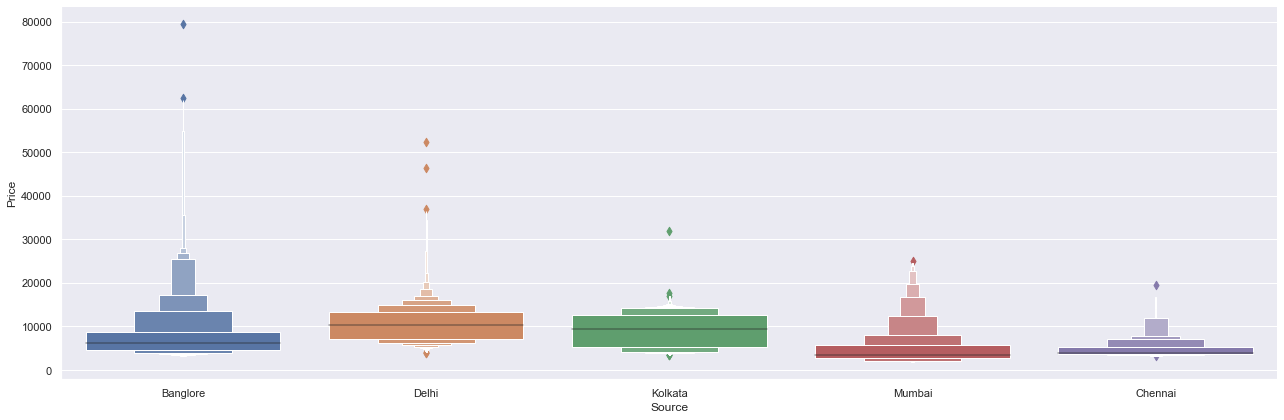

In [23]:
sns.catplot(y='Price',x='Source',data=train_data.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
plt.show()

In [24]:
Source = train_data[['Source']]
Source = pd.get_dummies(Source, drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [25]:
train_data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

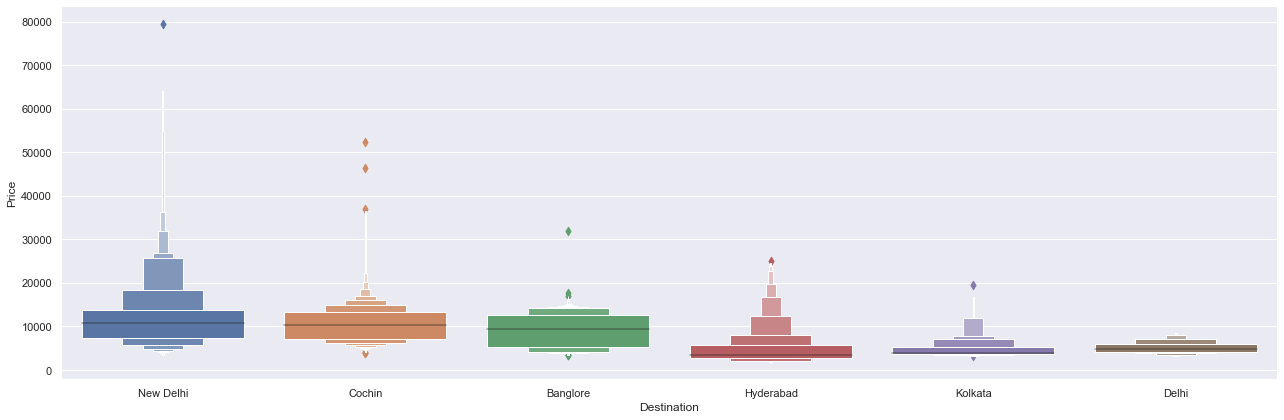

In [26]:
sns.catplot(y='Price',x='Destination',data=train_data.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
plt.show()

In [27]:
Destination = train_data[['Destination']]
Destination = pd.get_dummies(Destination, drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [28]:
train_data['Route'].value_counts()

DEL → BOM → COK                      2376
BLR → DEL                            1552
CCU → BOM → BLR                       979
CCU → BLR                             724
BOM → HYD                             621
                                     ... 
BOM → NDC → HYD                         1
BOM → JDH → JAI → DEL → HYD             1
BLR → HBX → BOM → BHO → DEL             1
BLR → CCU → BBI → HYD → VGA → DEL       1
CCU → RPR → HYD → BLR                   1
Name: Route, Length: 128, dtype: int64

In [29]:
train_data.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [30]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,dep_hour,dep_min,arr_hour,arr_min,dur_hour,dur_min
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [31]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

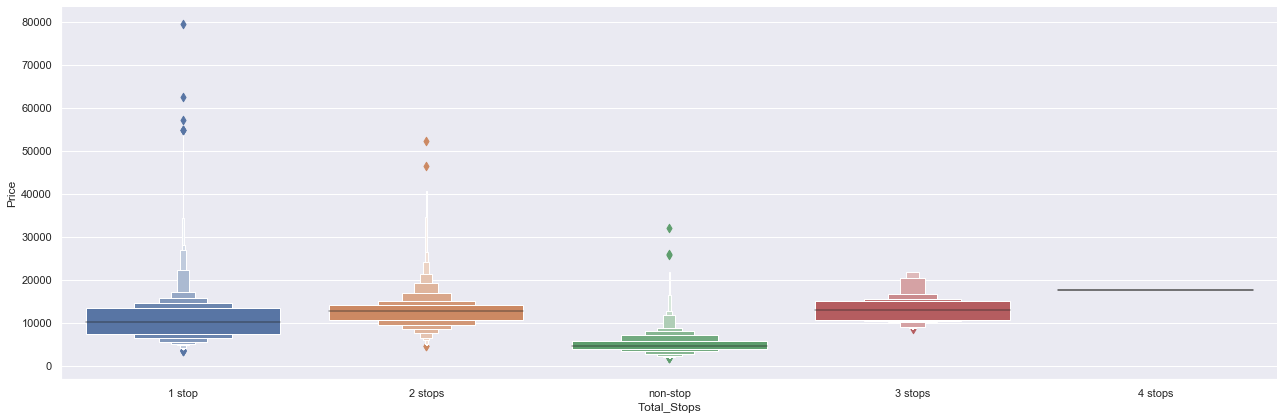

In [32]:
sns.catplot(y='Price',x='Total_Stops',data=train_data.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
plt.show()

In [33]:
train_data.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [34]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,dep_hour,dep_min,arr_hour,arr_min,dur_hour,dur_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [35]:
data_train = pd.concat([train_data,Airline,Source,Destination], axis=1)
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,dep_hour,dep_min,arr_hour,arr_min,dur_hour,dur_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [36]:
data_train.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [37]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,dep_hour,dep_min,arr_hour,arr_min,dur_hour,dur_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [38]:
data_train.shape

(10682, 30)

# TestSet

In [40]:
test_data = pd.read_excel('E:/Data_Science/data sets/Flight-Price-Prediction-master/Flight-Price-Prediction-master/Test_set.xlsx')
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [41]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [42]:
test_data['Duration'].value_counts()

2h 50m     122
1h 30m     107
2h 45m      95
2h 55m      81
3h          72
          ... 
16h 30m      1
32h 5m       1
32h 25m      1
33h 20m      1
28h 5m       1
Name: Duration, Length: 320, dtype: int64

In [43]:
test_data.dropna(inplace=True)

In [44]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [45]:
test_data.shape

(2671, 10)

In [46]:
test_data['Journey_day'] = pd.to_datetime(test_data.Date_of_Journey, format='%d/%m/%Y').dt.day

In [47]:
test_data['Journey_month'] = pd.to_datetime(test_data.Date_of_Journey, format='%d/%m/%Y').dt.month

In [48]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


In [49]:
test_data.drop(['Date_of_Journey'], axis=1, inplace=True)

In [50]:
# Now we take departure hour and minute from dep_time
test_data['dep_hour'] = pd.to_datetime(test_data.Dep_Time).dt.hour
test_data['dep_min'] = pd.to_datetime(test_data.Dep_Time).dt.minute

test_data.drop(['Dep_Time'],axis=1,inplace=True)

test_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,dep_hour,dep_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,12,5,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,No info,21,5,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,non-stop,No info,24,6,23,55


In [51]:
test_data['arr_hour'] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data['arr_min'] = pd.to_datetime(test_data.Arrival_Time).dt.minute

test_data.drop(['Arrival_Time'],axis=1,inplace=True)

test_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,dep_hour,dep_min,arr_hour,arr_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,23,55,2,45


In [52]:
duration = list(test_data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' 0m'
        else:
            duration[i] = '0h ' + duration[i]
            

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep='h')[0]))
    duration_mins.append(int(duration[i].split(sep='m')[0].split()[-1]))

In [53]:
test_data['dur_hour'] = duration_hours
test_data['dur_min'] = duration_mins

test_data.drop(['Duration'],axis=1,inplace=True)
test_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,dep_hour,dep_min,arr_hour,arr_min,dur_hour,dur_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,23,55,2,45,2,50


# Handling categorical values

In [54]:
test_data['Airline'].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64

In [55]:
Airline = test_data[['Airline']]
Airline = pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [56]:
test_data['Source'].value_counts()

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

In [57]:
Source = test_data[['Source']]
Source = pd.get_dummies(Source, drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [58]:
test_data['Destination'].value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

In [59]:
Destination = test_data[['Destination']]
Destination = pd.get_dummies(Destination, drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [60]:
test_data.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [61]:
test_data.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,dep_hour,dep_min,arr_hour,arr_min,dur_hour,dur_min
0,Jet Airways,Delhi,Cochin,1 stop,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1 stop,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1 stop,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1 stop,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,non-stop,24,6,23,55,2,45,2,50


In [62]:
test_data['Total_Stops'].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [63]:
test_data.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [64]:
test_data.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,dep_hour,dep_min,arr_hour,arr_min,dur_hour,dur_min
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,0,24,6,23,55,2,45,2,50


In [65]:
data_test = pd.concat([test_data,Airline,Source,Destination], axis=1)
data_test.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,dep_hour,dep_min,arr_hour,arr_min,dur_hour,dur_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,Air Asia,Banglore,Delhi,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [66]:
data_test.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [67]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,dep_hour,dep_min,arr_hour,arr_min,dur_hour,dur_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# Feature Selection

1. heatmap
2. feature_importance_
3. SelectKBest

In [68]:
data_train.shape

(10682, 30)

In [69]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'dep_hour',
       'dep_min', 'arr_hour', 'arr_min', 'dur_hour', 'dur_min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [70]:
X= data_train.loc[:,['Total_Stops', 'Journey_day', 'Journey_month', 'dep_hour',
       'dep_min', 'arr_hour', 'arr_min', 'dur_hour', 'dur_min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

X.head()

,Total_Stops,Journey_day,Journey_month,dep_hour,dep_min,arr_hour,arr_min,dur_hour,dur_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [71]:
y = data_train.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

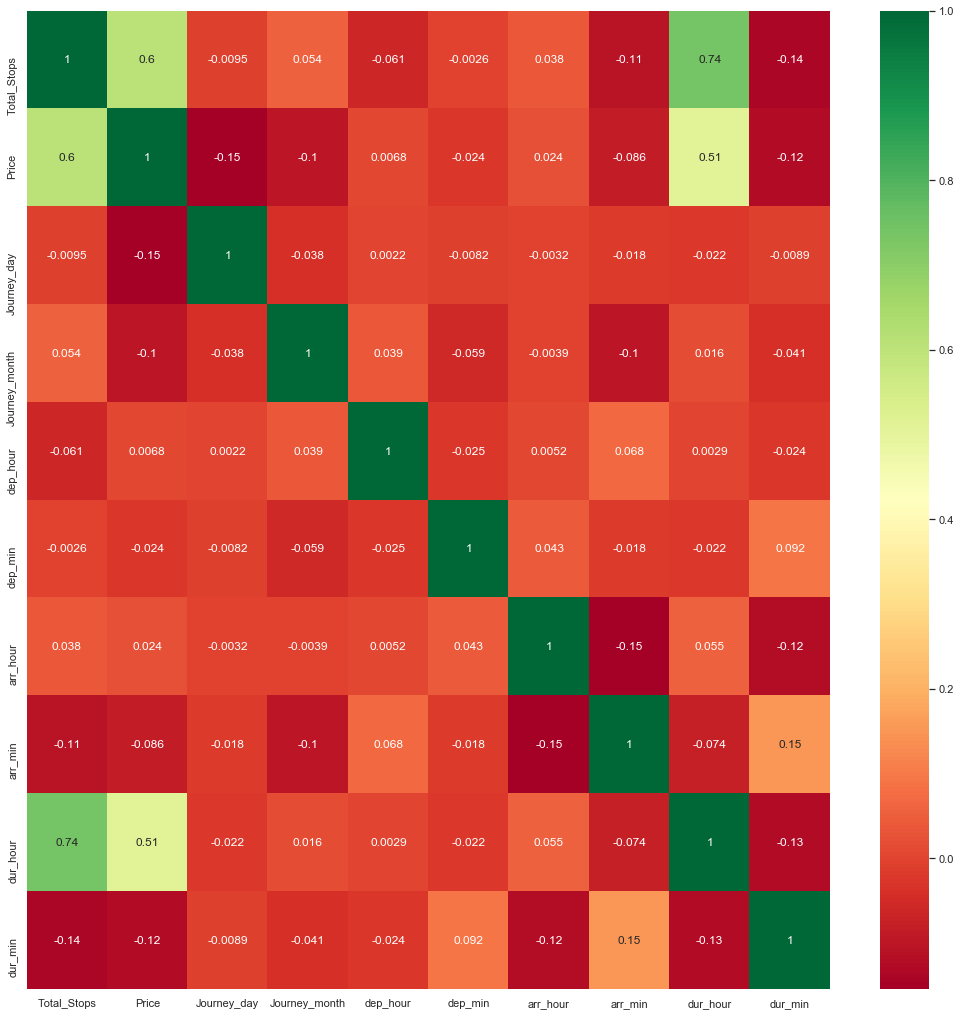

In [72]:
plt.figure(figsize=(18,18))
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn')

In [73]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [74]:
selection.feature_importances_

array([2.08162699e-01, 1.43510186e-01, 5.32106713e-02, 2.33881178e-02,
       2.16630953e-02, 2.80990764e-02, 1.90952801e-02, 1.41438983e-01,
       1.77272175e-02, 1.18421278e-02, 1.85952908e-03, 1.84186788e-02,
       1.39596277e-01, 6.75175792e-02, 1.90973723e-02, 8.94512836e-04,
       3.12460937e-03, 9.67331284e-05, 5.41217786e-03, 7.56169263e-05,
       6.83962384e-04, 8.35274599e-03, 3.80976005e-03, 5.66952082e-03,
       1.22845996e-02, 1.25328933e-02, 6.88059498e-03, 4.09513256e-04,
       2.51458691e-02])

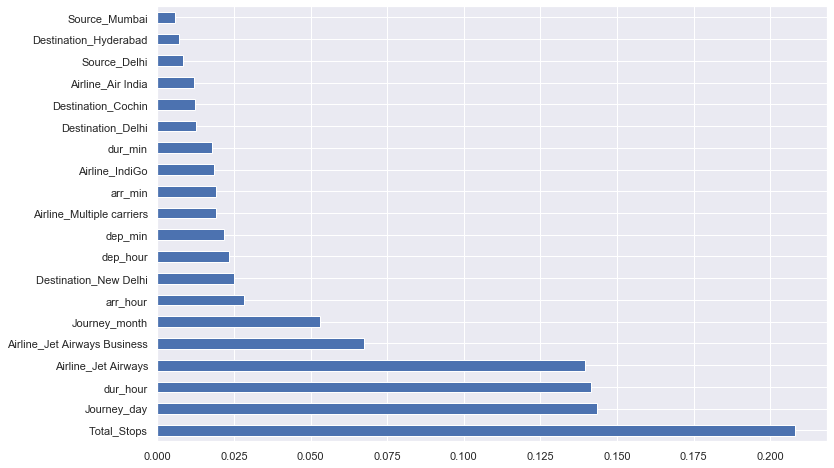

In [75]:
plt.figure(figsize=(12,8))
feat_importances = pd.Series(selection.feature_importances_,index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Fitting Model

In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [77]:
from sklearn.ensemble import RandomForestRegressor

In [78]:
model = RandomForestRegressor()

In [79]:
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [80]:
y_pred = model.predict(x_test)

In [81]:
model.score(x_train,y_train)

0.9545006071382339

In [82]:
model.score(x_test,y_test)

0.8024965671063123

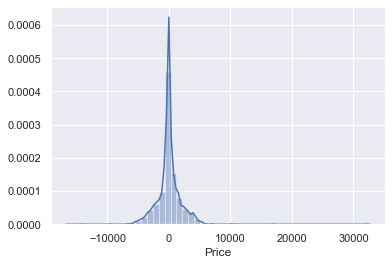

In [88]:
sns.distplot(y_test-y_pred)
plt.show()

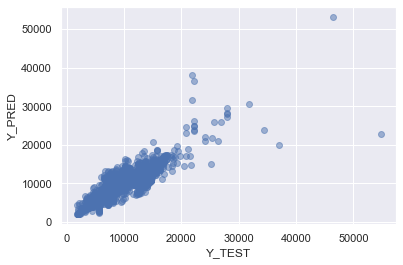

In [89]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel('Y_TEST')
plt.ylabel('Y_PRED')
plt.show()

In [90]:
from sklearn import metrics

In [91]:
print('MAE : ',metrics.mean_absolute_error(y_test,y_pred))
print('MSE : ',metrics.mean_squared_error(y_test,y_pred))
print('RMSE : ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE :  1215.472397894052
MSE :  4050931.7668317975
RMSE :  2012.6926657668819


In [92]:
metrics.r2_score(y_test,y_pred)

0.8024965671063123

# Hyperparameter tuning
1. RandomizedSearchCV --> Fast
2. GridSearchCV

In [93]:
from sklearn.model_selection import RandomizedSearchCV

In [94]:
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [95]:
random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf}

In [96]:
model_random = RandomizedSearchCV(estimator=model,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter =10,cv=5,verbose=2,random_state=1,n_jobs=1)

In [174]:
model_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=15 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=15, total=  21.1s
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=15 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.0s remaining:    0.0s


[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=15, total=  21.3s
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=15, total=  20.6s
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=15, total=  21.2s
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=15, total=  20.8s
[CV] n_estimators=800, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=5 
[CV]  n_estimators=800, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=5, total=  14.3s
[CV] n_estimators=800, min_samples_split=

[CV]  n_estimators=200, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   2.2s
[CV] n_estimators=200, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=200, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   2.2s
[CV] n_estimators=200, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=200, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   2.2s
[CV] n_estimators=200, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=200, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   2.2s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=30, total=   3.3s
[CV] n_estimators=100, min_samples_split=15

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  7.7min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=1, scoring='neg_mean_squared_error', verbose=2)

In [175]:
model_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 15}

In [176]:
prediction = model_random.predict(x_test)

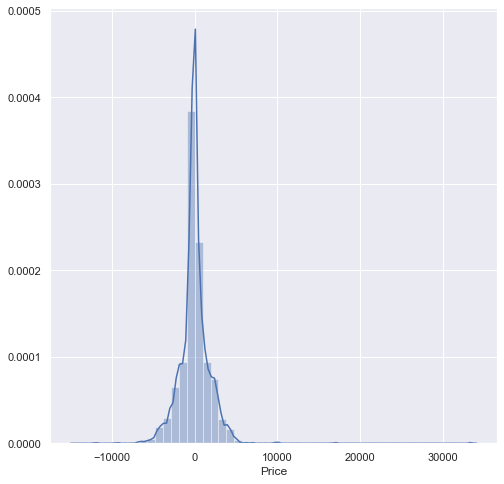

In [177]:
plt.figure(figsize=(8,8))
sns.distplot(y_test-prediction)
plt.show()

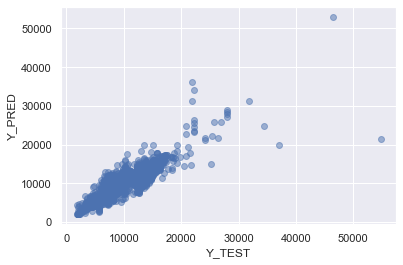

In [179]:
plt.scatter(y_test,prediction,alpha=0.5)
plt.xlabel('Y_TEST')
plt.ylabel('Y_PRED')
plt.show()

In [180]:
print('MAE : ',metrics.mean_absolute_error(y_test,prediction))
print('MSE : ',metrics.mean_squared_error(y_test,prediction))
print('RMSE : ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE :  1177.211778224187
MSE :  3646424.16095269
RMSE :  1909.5612482852416


In [181]:
metrics.r2_score(y_test,prediction)

0.8222183608543253

In [187]:
import pickle
file = open('flight_rf.pkl','wb')

pickle.dump(model_random, file)

In [188]:
model_rf = open('flight_rf.pkl','rb')
forest = pickle.load(model_rf)

In [189]:
y_prediction = forest.predict(x_test)

In [190]:
metrics.r2_score(y_test , y_prediction)

0.8222183608543253